RFM là viết tắt của Recency, Frequency, Monetary - đó là ba yếu tố quan trọng trong phân tích khách hàng và marketing. Các yếu tố RFM được sử dụng để đánh giá giá trị của khách hàng đối với doanh nghiệp. Cụ thể:

Recency: là thời gian kể từ lần giao dịch cuối cùng của khách hàng với doanh nghiệp. Khách hàng gần đây hơn có khả năng cao hơn để tiếp tục giao dịch với doanh nghiệp.

Frequency: là tần suất của các giao dịch của khách hàng với doanh nghiệp trong một khoảng thời gian nhất định. Khách hàng thường xuyên giao dịch với doanh nghiệp có giá trị cao hơn so với khách hàng ít giao dịch.

Monetary: là giá trị của các giao dịch mà khách hàng đã thực hiện với doanh nghiệp. Khách hàng có giá trị cao hơn khi họ đã chi tiêu nhiều tiền cho doanh nghiệp.
Phân tích RFM giúp các doanh nghiệp hiểu rõ hơn về các khách hàng của mình, từ đó có thể phát triển chiến lược marketing và chăm sóc khách hàng hiệu quả hơn

In [5]:
!pip install lifetimes

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Customer_Segmentation/RFM + CLTV/data.csv', encoding='latin1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
df['Country'].value_counts().head()

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64

In [11]:
uk = df[df['Country']=='United Kingdom']
uk['InvoiceDate'] =  pd.to_datetime(uk['InvoiceDate'])
# Loai bo gia tri nan
uk = uk[uk['CustomerID'].notna()]
uk.head()

<ipython-input-11-654f0f4fe24b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk['InvoiceDate'] =  pd.to_datetime(uk['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
uk.shape

(361878, 8)

In [13]:
uk = uk[uk['Quantity'] > 0]
uk = uk[uk['UnitPrice'] > 0]
uk.head(5)
print(uk.shape)

(354321, 8)


In [14]:
def add_years_to_date(data, date_column, m, y):

    data[date_column] = pd.to_datetime(data[date_column])
    data[date_column] = data[date_column] + pd.DateOffset(months=m) + pd.DateOffset(years=y)
    return data


In [15]:
uk  = add_years_to_date(uk, 'InvoiceDate', 4, 11)
uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-04-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-04-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-04-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-04-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-04-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
uk['InvoiceDate'].max()

Timestamp('2023-04-09 12:49:00')

### RFM ###

In [17]:
current_date = datetime.now()

uk['TotalPay'] = uk['Quantity'] * uk['UnitPrice']

rfm = uk.groupby(['CustomerID']).agg({'InvoiceDate': [lambda x: (x.max() - x.min()).days, # T
                                                                      lambda x: (current_date - x.max()).days], # Recency
                                                 'InvoiceNo': 'count', # Frequency
                                                 'TotalPay':'sum' # Monetary
                                                })
rfm.columns = rfm.columns.droplevel(0)
rfm.columns= ['T','Recency','Frequency','Monetary']
rfm


,T,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,0,521,1,77183.60
12747.0,366,196,103,4196.01
12748.0,372,195,4595,33719.73
12749.0,207,198,199,4090.88
12820.0,324,197,59,942.34
...,...,...,...,...
18280.0,0,471,10,180.60
18281.0,0,374,7,80.82
18282.0,117,202,12,178.05


In [23]:

rfm = rfm.reset_index()

In [21]:
# Ve phan phoi de kiem tra
def distribution(df):
  fig, ax = plt.subplots(1, 3, figsize=(16,8))
  sns.distplot(df['Recency'], ax = ax[0])
  sns.distplot(df['Frequency'], ax = ax[1])
  sns.distplot(df['Monetary'], ax = ax[2])
  plt.show()

<ipython-input-21-534359144173>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Recency'], ax = ax[0])
<ipython-input-21-534359144173>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Frequency'], ax = ax[1])
<ipython-input-21-534359144173>:6: UserWarning: 

`distplot` is a deprecated f

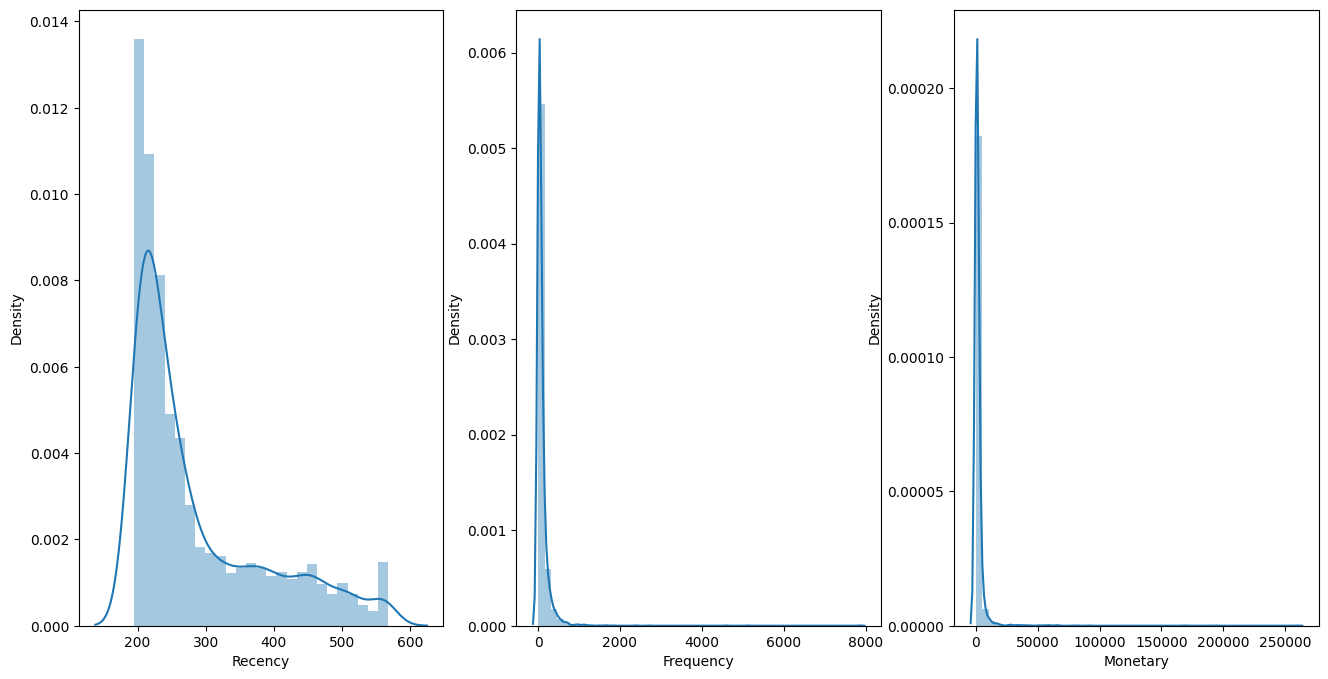

In [24]:
distribution(rfm)

In [25]:
rfm.describe()

,CustomerID,T,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,130.914541,286.089031,90.388010,1864.385601
std,1576.594671,132.316614,99.239774,217.808385,7482.817477
min,12346.000000,0.000000,195.000000,1.000000,3.750000
25%,14208.750000,0.000000,213.000000,17.000000,300.280000
50%,15569.500000,93.000000,243.000000,41.000000,652.280000
75%,16913.250000,253.000000,335.000000,99.250000,1576.585000
max,18287.000000,373.000000,568.000000,7847.000000,259657.300000


In [26]:
rfm[["Recency", "Frequency", "Monetary"]].quantile(
    q=[ .1, .2, .3, .4, .5, .57, .6, .7, .75, .8, .9, .95],                      # The percentile to calculate
    axis=0,                     # The axis to calculate the percentile on
    numeric_only=True,          # To calculate only for numeric columns
    interpolation='linear'      # The type of interpolation to use when the quantile is between 2 values
)

,Recency,Frequency,Monetary
0.10,200.0,7.00,152.914
0.20,208.0,13.00,242.204
0.30,218.0,20.00,336.421
0.40,228.0,29.00,465.628
0.50,243.0,41.00,652.280
0.57,257.0,52.00,801.337
0.60,265.0,58.00,897.676
0.70,301.3,83.00,1298.278
0.75,335.0,99.25,1576.585
0.80,371.2,120.00,1957.878


In [27]:
r_bins = [0, 78, 121, 180, 333, 384*2] #rfm_df.Recency.max()
f_bins = [0, 20, 58, 99.25, 206.00, 314.05 ** 2] # rfm_df.Freq.max()
m_bins = [0, 242.204, 465.628, 897.676, 1957.878, 5493.243 ** 2] #rfm_df.Money.max()

#rfm_copy = uk_rfm.copy()


rfm["R_score"] = pd.cut(rfm["Recency"], r_bins, right= True, retbins=False, labels=[5,4,3,2,1])
rfm["F_score"] = pd.cut(rfm["Frequency"], f_bins, right= True, retbins=False, labels= [1,2,3,4,5])
rfm["M_score"] = pd.cut(rfm["Monetary"], m_bins, right= True, retbins=False, labels= [1,2,3,4,5])
rfm

,CustomerID,T,Recency,Frequency,Monetary,R_score,F_score,M_score
0,12346.0,0,521,1,77183.60,1,1,5
1,12747.0,366,196,103,4196.01,2,4,5
2,12748.0,372,195,4595,33719.73,2,5,5
3,12749.0,207,198,199,4090.88,2,4,5
4,12820.0,324,197,59,942.34,2,3,4
...,...,...,...,...,...,...,...,...
3915,18280.0,0,471,10,180.60,1,1,1
3916,18281.0,0,374,7,80.82,1,1,1
3917,18282.0,117,202,12,178.05,2,1,1
3918,18283.0,334,198,756,2094.88,2,5,5


<p> 1 là tệ nhất, 5 là tốt nhất


In [28]:
rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm

,CustomerID,T,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,12346.0,0,521,1,77183.60,1,1,5,115
1,12747.0,366,196,103,4196.01,2,4,5,245
2,12748.0,372,195,4595,33719.73,2,5,5,255
3,12749.0,207,198,199,4090.88,2,4,5,245
4,12820.0,324,197,59,942.34,2,3,4,234
...,...,...,...,...,...,...,...,...,...
3915,18280.0,0,471,10,180.60,1,1,1,111
3916,18281.0,0,374,7,80.82,1,1,1,111
3917,18282.0,117,202,12,178.05,2,1,1,211
3918,18283.0,334,198,756,2094.88,2,5,5,255


In [29]:
segt_map = {
    r'[4-5][4-5][4-5]': 'champions',
    r'[2-5][3-5][3-5]': 'loyal customers',
    r'[3-5][2-5][1-3]': 'potential loyalists',
    r'[4-5][1-2][1-2]': 'recent customers',
    r'[3-5][1-2][3-5]': 'promising',
    r'[2-3][2-4][4-5]': 'customers needing attention',
    r'[2-3][1-3][1-3]': 'about to sleep',
    r'[1-2][2-5][2-5]': 'at risk',
    r'[1-2][3-5][3-5]': 'cannot lose them',
    r'[1-3][1-3][1-3]': 'hibernating',
    r'[0-2][0-2][0-5]': 'lost'

}

rfm['Segment'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

In [30]:
rfm

,CustomerID,T,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment
0,12346.0,0,521,1,77183.60,1,1,5,115,lost
1,12747.0,366,196,103,4196.01,2,4,5,245,loyal customers
2,12748.0,372,195,4595,33719.73,2,5,5,255,loyal customers
3,12749.0,207,198,199,4090.88,2,4,5,245,loyal customers
4,12820.0,324,197,59,942.34,2,3,4,234,loyal customers
...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,0,471,10,180.60,1,1,1,111,hibernating
3916,18281.0,0,374,7,80.82,1,1,1,111,hibernating
3917,18282.0,117,202,12,178.05,2,1,1,211,about to sleep
3918,18283.0,334,198,756,2094.88,2,5,5,255,loyal customers


In [31]:
rfm[rfm['Segment'].isna()] # check có TH bị bỏ qua

,CustomerID,T,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment


In [32]:
rfm['Segment'].value_counts()

loyal customers                1347
about to sleep                 1271
hibernating                     596
at risk                         382
customers needing attention     234
lost                             90
Name: Segment, dtype: int64

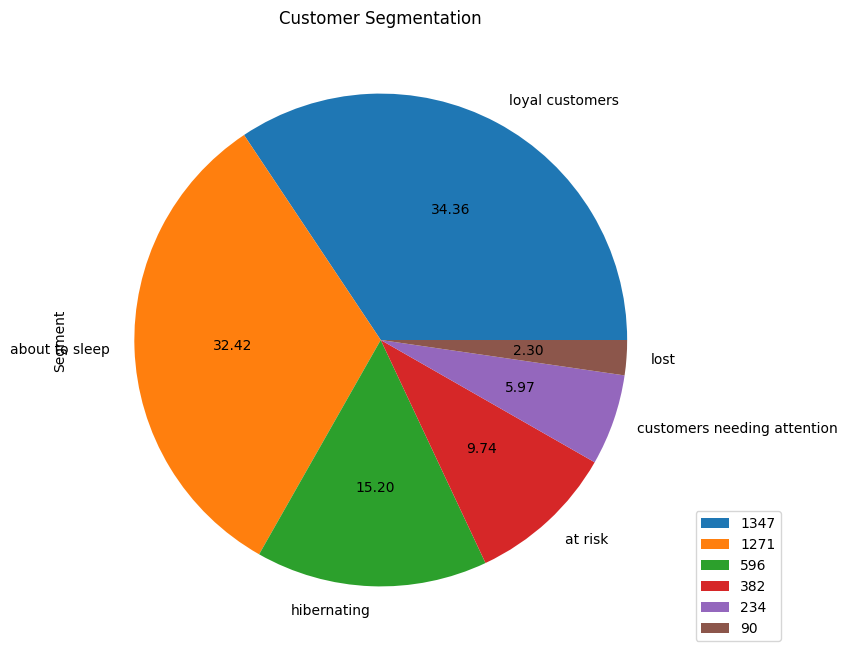

In [33]:

plt.subplots(figsize=(10, 8))
rfm['Segment'].value_counts().plot(kind='pie', autopct = '%.2f')
plt.title('RFM Segmentation')
plt.legend(labels=rfm['Segment'].value_counts(), bbox_to_anchor=(1, 0), loc='lower left')
plt.title('Customer Segmentation')
#plt.ylabel('')
plt.show()

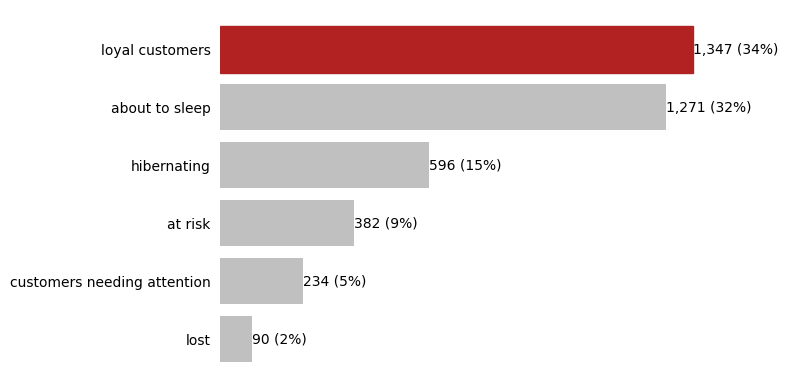

In [34]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()